In [ ]:
#bibliotecas usadas

import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import math
from matplotlib.colors import ListedColormap


In [ ]:
#Colocar arquivo do formulario que for usar
dados_formulario = pd.read_csv('arquivo.csv')

In [ ]:
#Exclui as linhas que não serão utilizadas para os gráficos

dados_formulario.drop(columns=['Carimbo de data/hora',
                             'Considerando o que foi apresentado, você concorda em participar de forma voluntária desta pesquisa?'
                             ], inplace=True)


# Renomeei os nomes das colunas do formulario para facilitar
nomeColunasAlterado = ["GENERO",
                       "MUDOU_DE_CIDADE",
                       "CIDADE_ESTADO_FAMILIA",
                       "NM_CURSO",
                       "SEMESTRE_INGRESSO",
                       "MOT_DECISAO",
                       "COMPUTADOR_CASA",
                       "EXP_TEC_INFANCIA",
                       "FATORES_ECONOMICOS_ESCOLHA_CURSO",
                       "EXPOSICAO_TEC_INFANCIA_FACILIDADE",
                       "HABILIDADE_MATEMATICA_PROBLEMAS",
                       "LAB_INFORMATICA_ESCOLA",
                       "ACESSO_LAB_INFORMATICA",
                       "RAZAO_NAO_ACESSO_LAB_INFORMATICA",
                       "AULA_INFORMATICA_FUNDAMENTAL",
                       "AULA_INFORMATICA_MEDIO",
                       "USAVA_LAB_EM_OUTRAS_DISCIPLINAS_FUNDAMENTAL",
                       "USAVA_LAB_EM_OUTRAS_DISCIPLINAS_MEDIO",
                       "LAB_ABERTO_FUNDAMENTAL",
                       "LAB_ABERTO_MEDIO",
                       "INCENTIVO_PROFESSOR_ESCOLA_TEC",
                       "PARTICIPACAO_EVENTO_ESCOLA_TEC",
                       "PARTICIPACAO_EVENTO_INF_TEC",
                       "PARTICIPACAO_EVENTO_INF_FUNDAMENTAL_TEC",
                       "NAO_PARTICIPACAO_EVENTOS_TEC_ESCOLA",
                       "EVENTOS_ESTIMULO_GRADUACAO_TEC",
                       "EVENTO_UFPB_TEC",
                       "IMPORTANCIA_OPINIAO_FAMILIA",
                       "APOIO_MAE_TEC",
                       "APOIO_PAI_TEC",
                       "APOIO_IRMAO_IRMA_TEC",
                       "APOIO_PRIMOS_TEC",
                       "APOIO_OUTROS_FAMILIARES_TEC",
                       "NAO_APOIO_FAMILIAR_TEC",
                       "INF_FAM_HOMENS_TEC_MOTIVACAO",
                       "INF_FAM_MULHERES_TEC_MOTIVACAO",
                       "INF_AMIGOS_HOMENS_TEC_MOTIVACAO",
                       "INF_AMIGAS_MULHERES_TEC_MOTIVACAO",
                       "SEM_CONTATO_PESSOAL_HOMENS_TEC",
                       "SEM_CONTATO_PESSOAL_MULHERES_TEC",
                       "INF_INSPIRACAO_HOMENS_RECONHECIDOS_TEC",
                       "INF_INSPIRACAO_MULHERES_RECONHECIDAS_TEC",
                       "INF_INSPIRACAO_FICTICIOS_TEC",
                       "MESMA_CHANCES_SUCESSO_COMPUTACAO_H_M"
]

print("Número de colunas no DataFrame:", len(dados_formulario.columns))
print("Número de nomes na lista nomeColunasAlterado:", len(nomeColunasAlterado))

for k in range(len(dados_formulario.columns.values)):
  dados_formulario.rename(columns={dados_formulario.columns.values[k]: nomeColunasAlterado[k]}, inplace = True)

Número de colunas no DataFrame: 44
Número de nomes na lista nomeColunasAlterado: 44


In [ ]:
#escala Likert para valores numéricos
likert_scale = {
    'Concordo totalmente': 5,
    'Concordo parcialmente': 4,
    'Discordo parcialmente': 2,
    'Discordo totalmente': 1
}

Função

In [ ]:
def mediaRanking(values):
    return np.mean(values)

def criarGraficoCalor(formularioDados, colunas_desejadas):
    # Mapeamento dos cursos para números
    cursos_para_numeros = {
        'Bacharelado em Ciência da Computação - Campus I': 'C1- Campus A',
        'Bacharelado em Ciência de Dados e Inteligência Artificial - Campus I': 'C2 - Campus A',
        'Bacharelado em Engenharia da Computação - Campus I': 'C3 - Campus A',
        'Licenciatura em Ciência da Computação - Campus IV': 'C4 - Campus B',
        'Bacharelado em Sistemas de Informação - Campus IV': 'C5 - Campus B'
    }

    # Calculando a média para cada uma das colunas selecionadas
    todas_as_medias = pd.DataFrame({
        'RM Geral': [
            mediaRanking(formularioDados[coluna].dropna().values.tolist()) for coluna in colunas_desejadas
        ],
        'RM Mulheres': [
            mediaRanking(formularioDados[formularioDados['GENERO'] == 'Feminino'][coluna].dropna().values.tolist()) for coluna in colunas_desejadas
        ],
        'RM Homens': [
            mediaRanking(formularioDados[formularioDados['GENERO'] == 'Masculino'][coluna].dropna().values.tolist()) for coluna in colunas_desejadas
        ],
        'C1- Campus A': [
            mediaRanking(formularioDados[formularioDados['NM_CURSO'] == 'Nome do curso utilizado 1'][coluna].dropna().values.tolist()) for coluna in colunas_desejadas
        ],
        'C2 - Campus A': [
            mediaRanking(formularioDados[formularioDados['NM_CURSO'] == 'Nome do curso utilizado 2'][coluna].dropna().values.tolist()) for coluna in colunas_desejadas
        ],
        'C3 - Campus A': [
            mediaRanking(formularioDados[formularioDados['NM_CURSO'] == 'Nome do curso utilizado 3'][coluna].dropna().values.tolist()) for coluna in colunas_desejadas
        ],
        'C4 - Campus B': [
            mediaRanking(formularioDados[formularioDados['NM_CURSO'] == 'Nome do curso utilizado 4'][coluna].dropna().values.tolist()) for coluna in colunas_desejadas
        ],
        'C5 - Campus B': [
            mediaRanking(formularioDados[formularioDados['NM_CURSO'] == 'Nome do curso utilizado 5'][coluna].dropna().values.tolist()) for coluna in colunas_desejadas
        ],
    }, index=colunas_desejadas)

    # Ordenar os dados por 'RM Geral'
    todas_as_medias = todas_as_medias.sort_values(by=['RM Geral'], ascending=False)

    # Gerando o gráfico de calor com Matplotlib
    fig, ax = plt.subplots(figsize=(14, 8))  # Aumentando o tamanho da imagem

    # Convertendo os dados para uma matriz numérica
    heatmap_data = todas_as_medias.values

    # Definindo uma paleta de cores personalizada para associar verde à maior pontuação e vermelho à menor
    cmap = plt.cm.RdYlGn  # Paleta com vermelho para baixo e verde para cima

    # Criando o gráfico de calor
    cax = ax.matshow(heatmap_data, cmap=cmap, vmin=1, vmax=5)  # Definindo limites para garantir que 1 seja vermelho e 5 seja verde

    # Ajustando os rótulos das colunas e linhas (diminuindo o tamanho das legendas do RM)
    ax.set_xticks(np.arange(len(todas_as_medias.columns)))
    ax.set_xticklabels(todas_as_medias.columns, rotation=90, ha="center", fontsize=12)  # Tamanho da fonte das colunas
    ax.set_yticks(np.arange(len(todas_as_medias.index)))
    ax.set_yticklabels([cursos_para_numeros.get(curso, curso) for curso in todas_as_medias.index], fontsize=12)  # Reduzindo o tamanho da fonte do eixo Y (RM)

    # Adicionando a barra de cores e ajustando a legenda
    cbar = fig.colorbar(cax, fraction=0.02, pad=0.04)  # Ajustando o tamanho da barra de cor
    cbar.set_ticks([1, 2, 3, 4, 5])
    cbar.set_label('Escala Likert', rotation=270, labelpad=20, fontsize=12)

    # Colocando os valores dentro de cada célula e aumentando o tamanho da fonte dos números
    for i in range(len(todas_as_medias.index)):
        for j in range(len(todas_as_medias.columns)):
            ax.text(j, i, f'{heatmap_data[i, j]:.2f}', ha='center', va='center', color='black', fontsize=12)  # Aumentando o tamanho da fonte dos números

    # Ajustando o layout para melhor exibição
    plt.tight_layout()

    # Criando a legenda abaixo do gráfico com "<omitido para revisão>"
    legenda_texto = "\n".join([f"{label}: <omitido para revisão>" for label in cursos_para_numeros.values()])
    plt.figtext(0.5, -0.15, legenda_texto, wrap=True, horizontalalignment='center', fontsize=12)


    # # Adicionando a legenda abaixo do gráfico
    # plt.figtext(0.5, -0.15, legenda_texto, wrap=True, horizontalalignment='center', fontsize=12)

    # Salvando o gráfico como imagem
    plt.savefig('grafico_calor_com_valores_organizado_com_legenda_padronizado.png', bbox_inches='tight')

    # Exibindo o gráfico
    plt.show()

    return todas_as_medias



# Exemplo de um gráfico

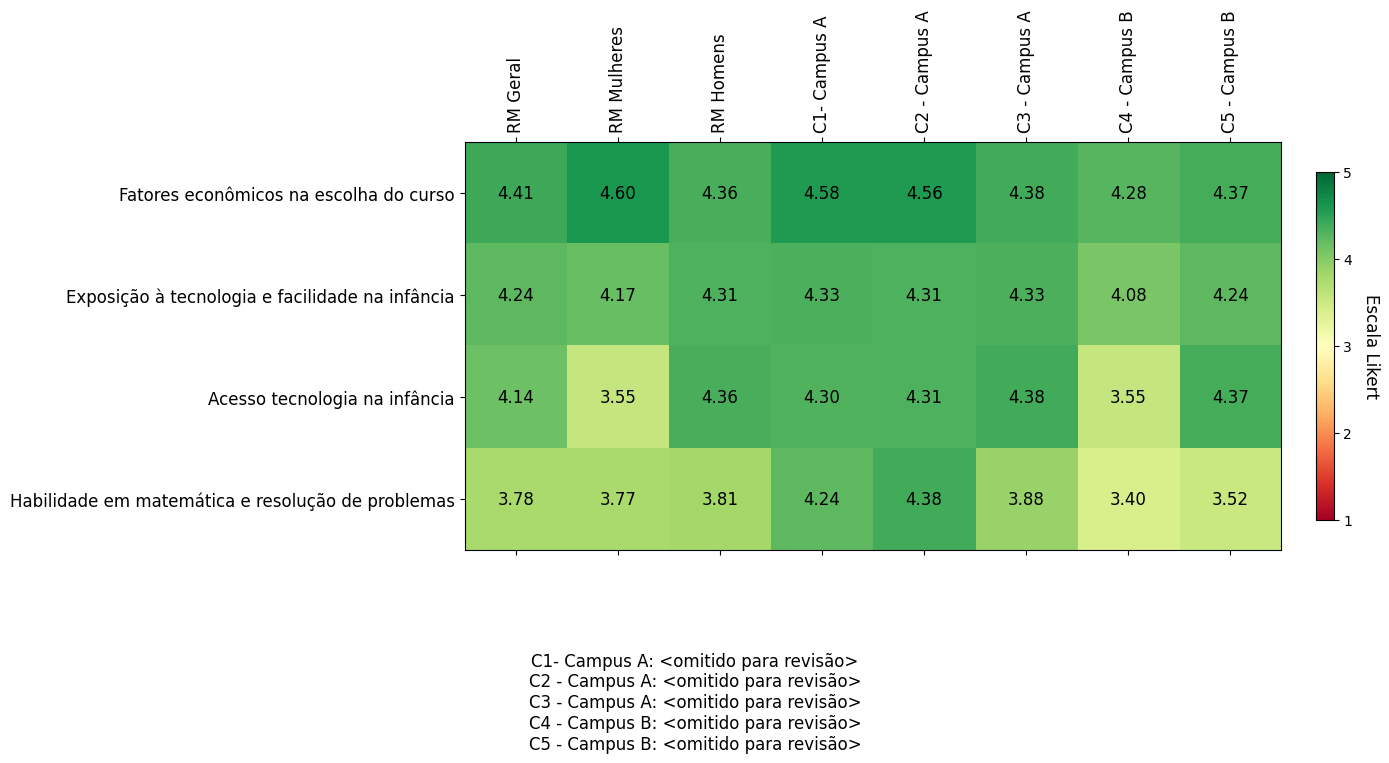

In [ ]:
# Criando o DataFrame e mapeando as colunas
dados_grafico1 = pd.DataFrame()
dados_grafico1['EXP_TEC_INFANCIA'] = dados_formulario['EXP_TEC_INFANCIA'].map(likert_scale)
dados_grafico1['FATORES_ECONOMICOS_ESCOLHA_CURSO'] = dados_formulario['FATORES_ECONOMICOS_ESCOLHA_CURSO'].map(likert_scale)
dados_grafico1['EXPOSICAO_TEC_INFANCIA_FACILIDADE'] = dados_formulario['EXPOSICAO_TEC_INFANCIA_FACILIDADE'].map(likert_scale)
dados_grafico1['HABILIDADE_MATEMATICA_PROBLEMAS'] = dados_formulario['HABILIDADE_MATEMATICA_PROBLEMAS'].map(likert_scale)
dados_grafico1['GENERO'] = dados_formulario['GENERO']
dados_grafico1['NM_CURSO'] = dados_formulario['NM_CURSO']

# Renomeando as colunas (caso queira)
dados_grafico1.rename(columns={
    'EXP_TEC_INFANCIA': 'renomeia do jeito que achar melhor1',
    'FATORES_ECONOMICOS_ESCOLHA_CURSO': 'renomeia do jeito que achar melhor2',
    'EXPOSICAO_TEC_INFANCIA_FACILIDADE': 'renomeia do jeito que achar melhor3',
    'HABILIDADE_MATEMATICA_PROBLEMAS': 'renomeia do jeito que achar melhor4'
}, inplace=True)

# Selecionando as colunas específicas
colunas_desejadas = [
    "renomeia do jeito que achar melhor1",
    "renomeia do jeito que achar melhor2",
    "renomeia do jeito que achar melhor3",
    "renomeia do jeito que achar melhor4"
]

# Gerando o gráfico de calor com os dados renomeados
criarGraficoCalor(dados_grafico1, colunas_desejadas)



# Exibindo o gráfico
plt.show()

